# TF-IDF

TF-IDF se calcula multiplicando dos componentes: TF e IDF.

   - TF se calcula como el número de veces que aparece una palabra en un documento dividido por el total de palabras en ese documento.
   
   - IDF se calcula como el logaritmo del total de documentos dividido por el número de documentos que contienen la palabra.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./movie_metadata.csv", sep=';', encoding="UTF-8")

In [3]:
df

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
0,1,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,79.0,178.0,33000;
1,2,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,71.0,235.0,0;
2,3,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,68.0,235.0,85000;
3,4,The Dark Knight Rises,Action|Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,85.0,235.0,164000;
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,71.0,NaN,0;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5039,Signed Sealed Delivered,Comedy|Drama,fraud|postal worker|prison|theft|trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,77.0,NaN,84;
5039,5040,The Following,Crime|Drama|Mystery|Thriller,cult|fbi|hideout|prison escape|serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,359.0,English,USA,TV-14,NaN,NaN,593.0,75.0,160.0,32000;
5040,5041,A Plague So Pleasant,Drama|Horror|Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,63.0,NaN,16;
5041,5042,Shanghai Calling,Comedy|Drama|Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,63.0,235.0,660;


In [4]:
df["genres"] = df["genres"].str.replace("|"," ")
df

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,79.0,178.0,33000;
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,71.0,235.0,0;
2,3,Spectre,Action Adventure Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,68.0,235.0,85000;
3,4,The Dark Knight Rises,Action Thriller,deception|imprisonment|lawlessness|police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,85.0,235.0,164000;
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,71.0,NaN,0;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5039,Signed Sealed Delivered,Comedy Drama,fraud|postal worker|prison|theft|trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,77.0,NaN,84;
5039,5040,The Following,Crime Drama Mystery Thriller,cult|fbi|hideout|prison escape|serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,359.0,English,USA,TV-14,NaN,NaN,593.0,75.0,160.0,32000;
5040,5041,A Plague So Pleasant,Drama Horror Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,63.0,NaN,16;
5041,5042,Shanghai Calling,Comedy Drama Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,63.0,235.0,660;


In [5]:
df["plot_keywords"] = df["plot_keywords"].str.replace("|"," ")
df

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,79.0,178.0,33000;
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,71.0,235.0,0;
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,68.0,235.0,85000;
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,85.0,235.0,164000;
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,71.0,NaN,0;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5039,Signed Sealed Delivered,Comedy Drama,fraud postal worker prison theft trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,77.0,NaN,84;
5039,5040,The Following,Crime Drama Mystery Thriller,cult fbi hideout prison escape serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,359.0,English,USA,TV-14,NaN,NaN,593.0,75.0,160.0,32000;
5040,5041,A Plague So Pleasant,Drama Horror Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,63.0,NaN,16;
5041,5042,Shanghai Calling,Comedy Drama Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,63.0,235.0,660;


In [6]:
df["texto"] = df[["genres","plot_keywords"]].apply(lambda row: " ".join(row.values.astype(str)),axis=1)
df

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;,texto
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,79.0,178.0,33000;,Action Adventure Fantasy Sci-Fi avatar future ...
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,71.0,235.0,0;,Action Adventure Fantasy goddess marriage cere...
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,68.0,235.0,85000;,Action Adventure Thriller bomb espionage seque...
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,85.0,235.0,164000;,Action Thriller deception imprisonment lawless...
4,5,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,71.0,NaN,0;,Documentary nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5039,Signed Sealed Delivered,Comedy Drama,fraud postal worker prison theft trial,Color,Scott Smith,1.0,87.0,2.0,318.0,...,English,Canada,NaN,NaN,2013.0,470.0,77.0,NaN,84;,Comedy Drama fraud postal worker prison theft ...
5039,5040,The Following,Crime Drama Mystery Thriller,cult fbi hideout prison escape serial killer,Color,NaN,43.0,43.0,NaN,319.0,...,English,USA,TV-14,NaN,NaN,593.0,75.0,160.0,32000;,Crime Drama Mystery Thriller cult fbi hideout ...
5040,5041,A Plague So Pleasant,Drama Horror Thriller,NaN,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,...,English,USA,NaN,1400.0,2013.0,0.0,63.0,NaN,16;,Drama Horror Thriller nan
5041,5042,Shanghai Calling,Comedy Drama Romance,NaN,Color,Daniel Hsia,14.0,100.0,0.0,489.0,...,English,USA,PG-13,NaN,2012.0,719.0,63.0,235.0,660;,Comedy Drama Romance nan


In [7]:
row = df[["genres","plot_keywords","texto"]].iloc[0]
row

genres                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object

In [17]:
df[["genres","plot_keywords","texto"]].iloc[0:10]

,genres,plot_keywords,texto
0,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Action Adventure Fantasy Sci-Fi avatar future ...
1,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Action Adventure Fantasy goddess marriage cere...
2,Action Adventure Thriller,bomb espionage sequel spy terrorist,Action Adventure Thriller bomb espionage seque...
3,Action Thriller,deception imprisonment lawlessness police offi...,Action Thriller deception imprisonment lawless...
4,Documentary,NaN,Documentary nan
5,Action Adventure Sci-Fi,alien american civil war male nipple mars prin...,Action Adventure Sci-Fi alien american civil w...
6,Action Adventure Romance,sandman spider man symbiote venom villain,Action Adventure Romance sandman spider man sy...
7,Adventure Animation Comedy Family Fantasy Musi...,17th century based on fairy tale disney flower...,Adventure Animation Comedy Family Fantasy Musi...
8,Action Adventure Sci-Fi,artificial intelligence based on comic book ca...,Action Adventure Sci-Fi artificial intelligenc...
9,Adventure Family Fantasy Mystery,blood book love potion professor,Adventure Family Fantasy Mystery blood book lo...


In [19]:
print(df["texto"].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [21]:
tfidf = TfidfVectorizer(max_features=2000)

In [22]:
X = tfidf.fit_transform(df["texto"])

In [23]:
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 43542 stored elements in Compressed Sparse Row format>

In [24]:
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

In [25]:
tfidf_df.head(10)

,11,12,16th,17th,1800s,18th,1920s,1930s,1940s,1950s,...,wrong,wrongful,yakuza,yard,year,york,you,young,younger,zombie
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.359401,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ejemplo de representacion del td

In [26]:
peliculas = pd.Series(df.index, index=df["movie_title"])

In [27]:
peliculas

movie_title
Avatar                                                        0
Pirates of the Caribbean: At World's End                      1
Spectre                                                       2
The Dark Knight Rises                                         3
Star Wars: Episode VII - The Force Awakens                    4
                                                           ... 
Signed Sealed Delivered                                    5038
The Following                                              5039
A Plague So Pleasant                                       5040
Shanghai Calling                                           5041
My Date with Drew                                          5042
Length: 5043, dtype: int64

In [28]:
peliculas.index = peliculas.index.str.strip()

In [29]:
indice = peliculas["The Dark Knight Rises"]
indice

3

### TF-IDF de una pelicula respecto a los documentos

Aqui en "X" están todos los pesos de las distintas palabras en cada frase, cada fila representa el peso de cada palabra en una frase.

In [33]:
consulta = X[indice]
consulta

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [31]:
print(consulta)

  (0, 31)	0.1504210182137623
  (0, 1781)	0.13822274931527975
  (0, 1766)	0.3444753764548997
  (0, 473)	0.4600471184715215
  (0, 889)	0.48046824949818506
  (0, 1361)	0.2650353136997721
  (0, 1250)	0.3737805559723538
  (0, 1354)	0.43261529370420637


In [34]:
print(consulta.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


### Con el vector de la consulta de 1 pelicula buscamos las similitudes con todas las filas que ya tienen aplicadas el tf-IDF

In [35]:
similitudes = cosine_similarity(consulta, X)

In [36]:
similitudes

array([[0.02372566, 0.02191354, 0.18373095, ..., 0.05292495, 0.        ,
        0.        ]])

In [37]:
similitudes = similitudes.flatten()

In [38]:
similitudes[3]

1.0000000000000002

In [33]:
!pip install matplotlib -q

In [39]:
import matplotlib.pyplot as plt

### Mostramos en una grafica todas las similitudes con la pelicula 

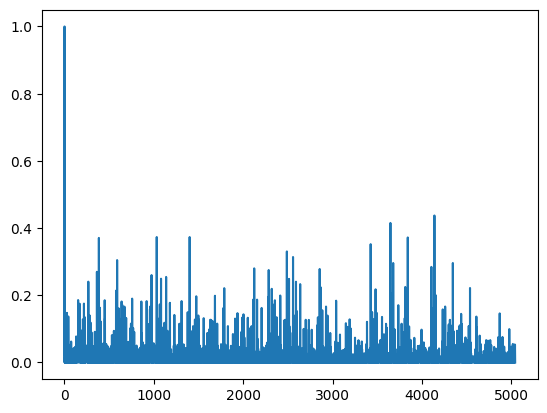

In [40]:
plt.plot(similitudes)

Ordenamos las filas de similitudes 

In [41]:
(-similitudes).argsort()

array([   3, 4139, 3647, ..., 2379, 2362, 5042], dtype=int64)

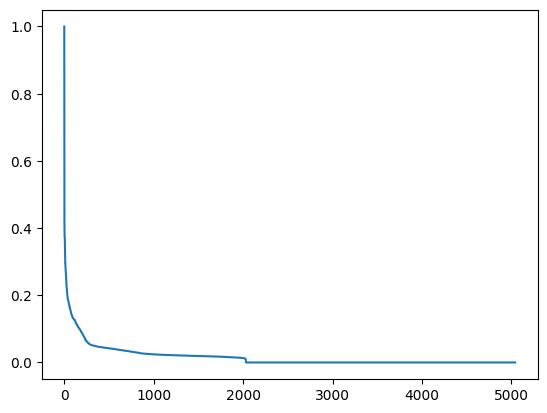

In [42]:
plt.plot(similitudes[(-similitudes).argsort()])

### Nos quedamos con las 10 filas mas similares/cercanas a 1 que representan a las peliculas mas similares

In [43]:
recomendacion = (-similitudes).argsort()[1:11]
recomendacion

array([4139, 3647, 1034, 1402, 3841,  387, 3426, 2489, 2558,  591],
      dtype=int64)

In [44]:
df["movie_title"].iloc[recomendacion]

4139            AWOL-72 
3647           Deadfall 
1034            The One 
1402    Lethal Weapon 3 
3841     Police Academy 
387     The Devil's Own 
3426            Swelter 
2489      Let's Be Cops 
2558           Hot Fuzz 
591          Die Hard 2 
Name: movie_title, dtype: object